In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 2
setup_one_gpu(GPU)

Picking GPU 2


In [5]:
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt
from general_tools.notebook.tf import reset_tf_graph
from general_tools.in_out.basics import create_dir
from geo_tool import Point_Cloud

from tf_lab.data_sets.shape_net import snc_category_to_synth_id
from tf_lab.iclr.helper import load_multiple_version_of_pcs

In [6]:
from tf_lab.gans.vanilla_gan import Vanilla_GAN
from tf_lab.gans.w_gan_gp import W_GAN_GP

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator,\
point_cloud_generator, leaky_relu

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
save_model = False
do_training = True
plot_train_curve = True
max_epochs = 2000
save_syn_step = 100
save_synthetic_samples = np.hstack([np.array([1, 5, 10]), 
                                    np.arange(save_syn_step, max_epochs + 1, 
                                              save_syn_step)])
do_wgan = True

In [9]:
if do_wgan:
    gan_tag = 'r_w_gan'
else:
    gan_tag = 'r_gan'

In [10]:
class_name = 'car'
# = raw_input('Give me the class type.\n').lower()
syn_id = snc_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/synthetic_samples_new/r_gan/'

In [11]:
n_pc_points = 2048
beta = 0.5

discriminator = mlp_discriminator
generator = point_cloud_generator
gen_kwargs = {'b_norm': [False]}

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.2}
noise_dim = 128
init_lr = 0.0001


if do_wgan:
    arch_tag = 'mlp_pc_gen_default'
    disc_kwargs = {'b_norm': [False]}
else:    
    arch_tag = 'mlp_pc_gen_default_leak_20'
    leak = 0.2
    disc_kwargs = {'non_linearity': leaky_relu(leak), 'b_norm': [False]}


n_output = [n_pc_points, 3]
experiment_name = '_'.join([class_name, arch_tag, gan_tag, str(n_pc_points) + '_pts'])

In [12]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)
training_data = in_data['train']
n_syn_samples = training_data.num_examples  # Same number as original GT data.

751 pclouds were loaded. They belong in 1 shape-classes.
6372 pclouds were loaded. They belong in 1 shape-classes.
374 pclouds were loaded. They belong in 1 shape-classes.


In [ ]:
reset_tf_graph()

if do_wgan:
    lam = 10
    gan = W_GAN_GP(experiment_name, init_lr, lam, n_output, noise_dim,
                    discriminator, generator,
                    disc_kwargs=disc_kwargs, beta=beta)
    
else:    
    gan = Vanilla_GAN(experiment_name, init_lr, n_output, noise_dim,
                 discriminator, generator, beta=beta, 
                 gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (0.5774706206321716, 0.2114582797139883) 24.8962380886


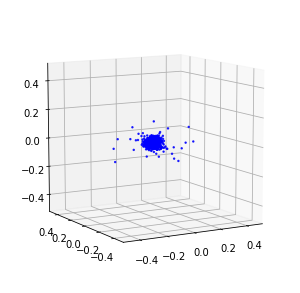

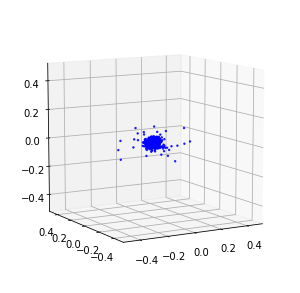

2 (-0.17929244410991668, 0.7266340970993042) 26.315967083
3 (-0.03428123694658279, 0.9214300286769866) 26.5111601353
4 (-0.04041292501986027, 0.9104412055015564) 25.4568638802
5 (-0.06349329218268394, 0.9600250315666199) 26.1165189743


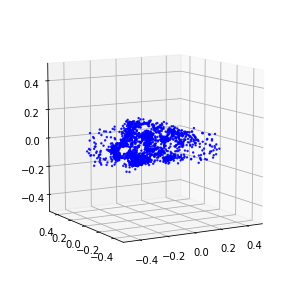

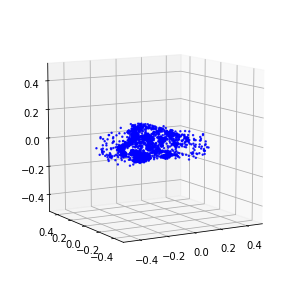

6 (-0.0933784552514553, 1.1826638197898864) 26.6451239586
7 (-0.12167719787359238, 1.4204280328750611) 27.7180998325
8 (-0.1290336202979088, 1.4985572481155396) 27.5666692257
9 (-0.1397687895298004, 1.5228693866729737) 28.4077501297
10 (-0.1374855996966362, 1.5726158761978148) 26.7373640537


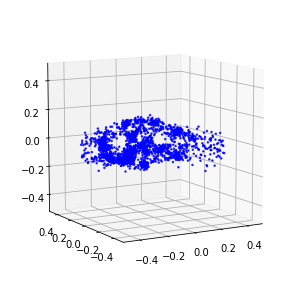

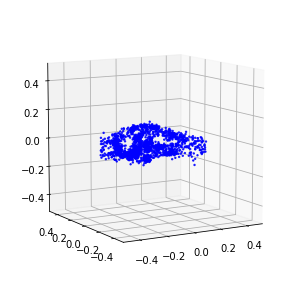

11 (-0.138178279876709, 1.588762788772583) 25.7755692005
12 (-0.13718199461698533, 1.5643100452423095) 26.1649141312
13 (-0.1362104189991951, 1.5697143363952637) 26.8183910847
14 (-0.14141943126916887, 1.538362717628479) 26.6023099422
15 (-0.1411677878499031, 1.562903232574463) 26.5590071678
16 (-0.1357655336856842, 1.5855643606185914) 26.1785128117
17 (-0.13761081254482269, 1.5342889070510863) 25.9663770199
18 (-0.1347133535146713, 1.4771817541122436) 31.6012561321
19 (-0.13204978221654892, 1.4205801963806153) 26.1816620827
20 (-0.12249838295578956, 1.4578614139556885) 26.8283951283
21 (-0.12059680408239365, 1.441870846748352) 26.2621221542
22 (-0.1120176169872284, 1.4410206174850464) 25.6833341122
23 (-0.10566887900233268, 1.367972207069397) 26.8385930061
24 (-0.10089843124151229, 1.3355010557174682) 32.5694179535
25 (-0.09337470653653145, 1.247867102622986) 26.0933668613
26 (-0.09103621450066567, 1.2202859926223755) 26.2170917988
27 (-0.08510489419102668, 1.2773497676849366) 27.1885

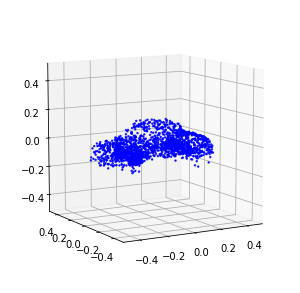

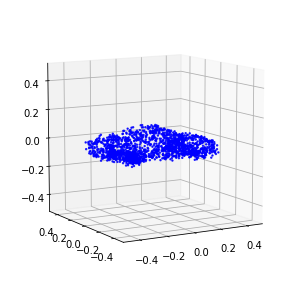

101 (-0.02830846307426691, 0.5675226247310639) 26.2221400738
102 (-0.03193501886725426, 0.5543124663829804) 26.3257269859
103 (-0.038184339702129366, 0.580029433965683) 26.4142520428
104 (-0.029186640083789826, 0.55578409075737) 26.5980060101
105 (-0.032683931834995746, 0.47997981786727906) 27.1693110466
106 (-0.029265086390078066, 0.5063285422325134) 28.0758450031
107 (-0.03497884351015091, 0.5141311490535736) 26.9254169464
108 (-0.03090505716204643, 0.5838591802120209) 25.5452888012
109 (-0.03300926786661148, 0.5687110805511475) 27.4951229095
110 (-0.02959214188158512, 0.590856751203537) 25.9384539127
111 (-0.02845897712558508, 0.5060797703266143) 25.7981190681
112 (-0.02883452780544758, 0.5554087245464325) 36.7604660988
113 (-0.028397879987955094, 0.5317229175567627) 25.3370928764
114 (-0.02804883919656277, 0.45208043217658994) 26.2542281151
115 (-0.027455823995172976, 0.46361625075340274) 27.2226188183
116 (-0.023457787558436395, 0.45481575846672057) 26.9840559959
117 (-0.023991925

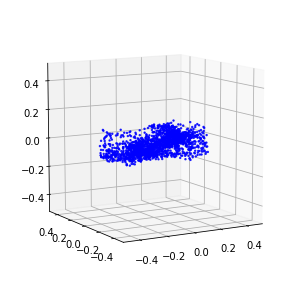

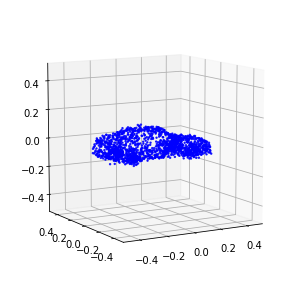

201 (-0.006271988324820996, 0.2471472591161728) 25.9615921974
202 (0.001612869791686535, 0.41092590175569055) 26.1281971931
203 (-0.0075077213309705255, 0.431683269739151) 27.5579581261
204 (0.00012415986135601997, 0.6668576848506927) 27.1788470745
205 (-0.00040138200670480727, 0.7108529400825501) 26.7809939384
206 (-0.0027983993254601957, 0.647768325805664) 26.2460839748
207 (-0.0009792077466845512, 0.7071016335487366) 26.1744148731
208 (-0.0007927200123667717, 0.7219855523109436) 26.2146229744
209 (-0.00065824269130826, 0.7209897756576538) 27.5210399628
210 (0.0009520422220230103, 0.6033261549472809) 27.8985290527
211 (-0.00177070614695549, 0.5266701793670654) 26.3629889488
212 (-0.0010384594947099686, 0.45717701196670535) 26.1773469448
213 (-0.0022020873203873635, 0.31812467707321046) 28.2197790146
214 (-0.005133860889822245, 0.5891438841819763) 28.1416780949
215 (-0.0005195555910468101, 0.3090576434135437) 26.1896679401
216 (-4.536132514476776e-05, 0.541810133755207) 27.7750079632


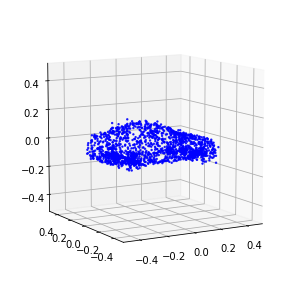

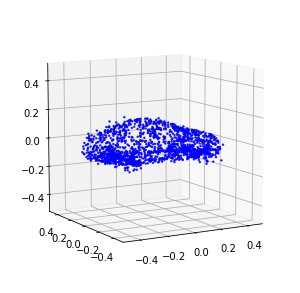

301 (0.004433067064732313, -0.3170502385497093) 25.9463529587
302 (0.009385795395821333, -0.40187630608677866) 26.4479560852
303 (0.009824703004211188, -0.264705255292356) 26.338891983
304 (0.004278230264782906, -0.19798314560204744) 26.4593219757
305 (-0.001699910819530487, -0.09133108174428343) 26.9656090736
306 (0.0020630760043859483, -0.014491545408964157) 26.3429620266
307 (0.004669652082026005, -0.12811704739928245) 26.3180291653
308 (0.004967376302927732, -0.17072885669767857) 26.256608963
309 (0.0058641831651329995, -0.1428111544623971) 26.3445129395
310 (0.008478233128786088, -0.21159625764936207) 26.339400053
311 (0.00623457058519125, -0.22408296673558653) 26.2492580414
312 (0.008383877716958523, 0.045062920302152636) 26.5462899208
313 (0.006417301747947931, -0.019927497059106826) 26.6866080761
314 (0.003077688701450825, -0.1706366863101721) 27.1319909096
315 (0.006583686489611864, -0.36704179406166076) 25.8225870132
316 (0.0043190490156412124, -0.36804727792739866) 26.618290

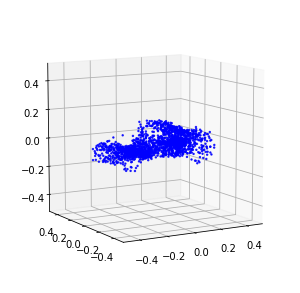

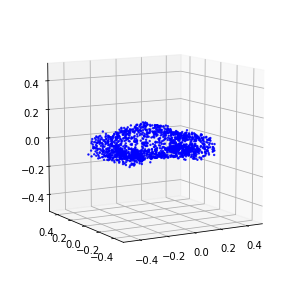

401 (0.0018623477444052697, -0.8095540928840638) 28.7658159733
402 (0.0019294411577284337, -0.6121551716327667) 26.2951960564
403 (0.005731861505657435, -0.3897448355145752) 26.0442671776
404 (0.0006975181773304939, -0.2416938564181328) 26.8213970661
405 (-0.0006950189620256424, 0.12065569557249546) 26.3437800407
406 (-1.1567946523427963e-05, -0.13990408945828675) 26.371598959
407 (0.004459022201597691, -0.19467562340199948) 28.1402819157
408 (0.003968494314700365, -0.17579062603414058) 26.4516441822
409 (-0.002559439316391945, -0.07241412997245789) 26.7030229568
410 (0.0029245850406587125, -0.19167853925377132) 26.1630160809
411 (0.003711737561970949, -0.0660356479138136) 26.126500845
412 (0.00422083019465208, -0.11751999162137508) 26.1806771755
413 (0.010383706022053957, -0.18945917934179307) 26.8889122009
414 (0.004581147119402886, -0.31519430220127104) 26.164137125
415 (0.010181310519576072, -0.2995926281809807) 25.962138176
416 (0.005775623507797718, -0.4046492839604616) 26.299665

In [ ]:
save_syn_data_dir = create_dir(osp.join(synthetic_data_out_dir, experiment_name))

if do_training:
    for _ in range(max_epochs):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params)
        epoch = int(gan.sess.run(gan.increment_epoch))            
        print epoch, loss, duration
        
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=epoch)
            
        if epoch in save_synthetic_samples:
            syn_data = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_data)
            np.savez(osp.join(save_syn_data_dir, 'epoch_' + str(epoch)), syn_data)
            for k in range(2):
                Point_Cloud(syn_data[k]).plot()
        train_stats.append((epoch,) + loss)

In [ ]:
if plot_train_curve:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss, '--')
    plt.plot(x, g_loss)
    plt.title('Latent GAN training. (%s, %s)' %(class_name, ae_loss))
    plt.legend(['Discriminator', 'Generator'], loc=0)
    
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    
    plt.xlabel('Epochs.') 
    plt.ylabel('Loss.')